### Применение методов оптимизации для решения задачи классификации

In [709]:
from sklearn import datasets
import numpy as np
import pandas as pd

In [710]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [711]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [712]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [713]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [714]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [715]:
iris = pd.DataFrame(
    data = np.c_[iris['data'], iris['target']],
    columns = iris['feature_names'] + ['target']
)

In [716]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [717]:
# можно было определить versicolor и virginica сразу [0, 1] классы, но мы удалим таргет 0 и воспользуемся LabelEncoding, не зря же учили 
species = []

for i in range(len(iris['target'])):
    if iris['target'][i] == 0:
        species.append("setosa")
    elif iris['target'][i] == 1:
        species.append('versicolor')
    else:
        species.append('virginica')


iris['species'] = species

In [718]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica


In [719]:
iris.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [720]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


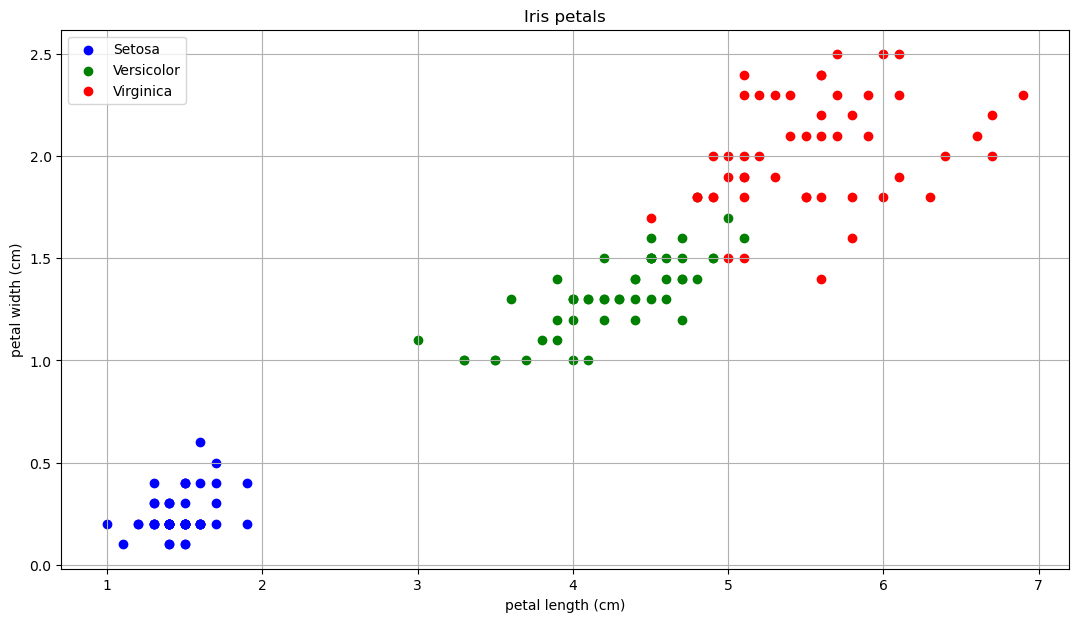

In [721]:
import matplotlib.pyplot as plt

setosa = iris[iris.species == "setosa"]
versicolor = iris[iris.species=='versicolor']
virginica = iris[iris.species=='virginica']

fig, ax = plt.subplots()
fig.set_size_inches(13, 7) # adjusting the length and width of plot

# lables and scatter points
ax.scatter(setosa['petal length (cm)'], setosa['petal width (cm)'], label="Setosa", facecolor="blue")
ax.scatter(versicolor['petal length (cm)'], versicolor['petal width (cm)'], label="Versicolor", facecolor="green")
ax.scatter(virginica['petal length (cm)'], virginica['petal width (cm)'], label="Virginica", facecolor="red")


ax.set_xlabel("petal length (cm)")
ax.set_ylabel("petal width (cm)")
ax.grid()
ax.set_title("Iris petals")
ax.legend()

In [722]:
iris.columns.tolist()

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'target',
 'species']

In [723]:
# Оставляем только классы Iris Versicolor и Iris Virginica
iris_filtered = iris[iris['target'] != 0]
iris_filtered

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
50,7.0,3.2,4.7,1.4,1.0,versicolor
51,6.4,3.2,4.5,1.5,1.0,versicolor
52,6.9,3.1,4.9,1.5,1.0,versicolor
53,5.5,2.3,4.0,1.3,1.0,versicolor
54,6.5,2.8,4.6,1.5,1.0,versicolor
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica


In [724]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [725]:
le.fit(iris_filtered['species'])

LabelEncoder()

In [726]:
le.classes_

array(['versicolor', 'virginica'], dtype=object)

In [727]:
le.inverse_transform([1, 0, 1])

array(['virginica', 'versicolor', 'virginica'], dtype=object)

In [728]:
y = pd.Series(data=le.transform(iris_filtered['species']))
y.head

<bound method NDFrame.head of 0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Length: 100, dtype: int64>

In [729]:
y.sum() # я вот так проверяю корректность (не надо так), хотя на прошлой строчке и так вывели все 

50

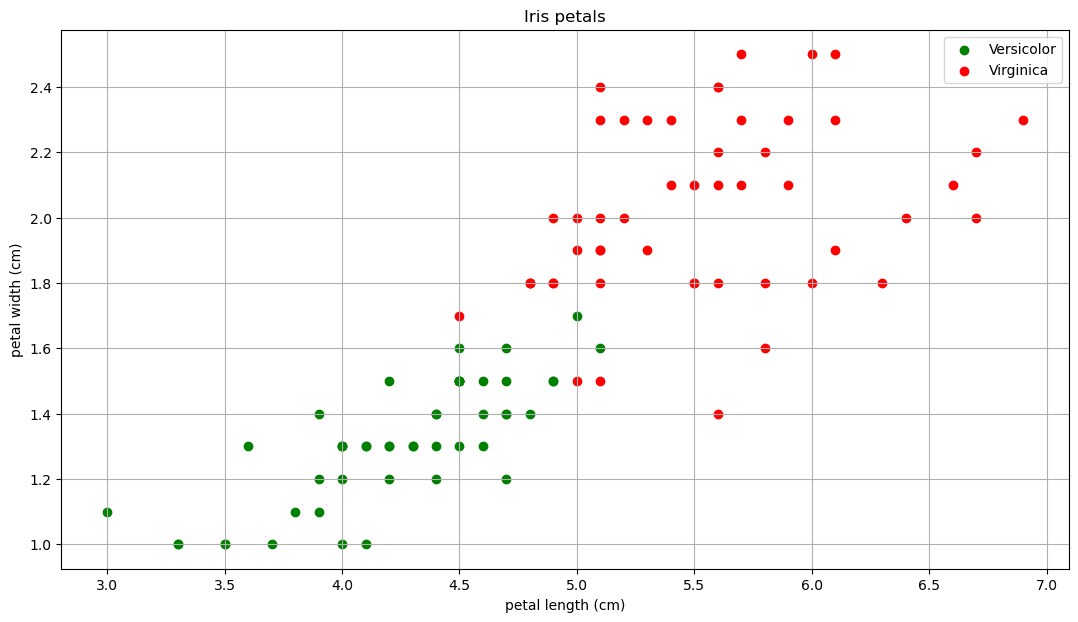

In [730]:
versicolor = iris_filtered[iris_filtered.species=='versicolor']
virginica = iris_filtered[iris_filtered.species=='virginica']

fig, ax = plt.subplots()
fig.set_size_inches(13, 7) # adjusting the length and width of plot

# lables and scatter points
ax.scatter(versicolor['petal length (cm)'], versicolor['petal width (cm)'], label="Versicolor", facecolor="green")
ax.scatter(virginica['petal length (cm)'], virginica['petal width (cm)'], label="Virginica", facecolor="red")

ax.set_xlabel("petal length (cm)")
ax.set_ylabel("petal width (cm)")
ax.grid()
ax.set_title("Iris petals")
ax.legend()

In [731]:
X = iris_filtered
#Y = iris_filtered['species']
del X['target']
del X['species']
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [732]:
y.name = 'target'
y

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: target, Length: 100, dtype: int64

In [733]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [734]:
iris_filtered

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [755]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def score(y_true, y_pred):
    return np.mean(y_true == y_pred)

def predict(X, theta):
    X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add bias term
    predictions = sigmoid(np.dot(X, theta))
    return (predictions >= 0.5).astype(int)

### LogisticRegression with gradient

In [735]:
#класс
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.theta = None

    def fit(self, X, y):
        X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add bias term
        self.theta = np.zeros(X.shape[1])

        for _ in range(self.num_iterations):
            z = np.dot(X, self.theta)
            h = sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.learning_rate * gradient

    def predict(self, X):
        X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add bias term
        predictions = sigmoid(np.dot(X, self.theta))
        return (predictions >= 0.5).astype(int)


In [737]:
# Обучение логистической регрессии
model = LogisticRegression()
model.fit(X_train, Y_train)

In [738]:
# Прогнозирование на тестовом наборе
predictions = model.predict(X_test)

In [739]:
acc = score(Y_test, predictions)
print("score:", acc)

score: 0.85


In [848]:
#фнукция

def logistic_regression(X, y, learning_rate=0.01, num_iterations=1000):
    X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add bias term
    theta = np.zeros(X.shape[1])
    score_history = []  # Для сохранения истории точности

    for _ in range(num_iterations):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / y.size
        theta -= learning_rate * gradient

        predictions = predict(X[:, 1:], theta)
        acc = score(y, predictions)
        score_history.append(acc)

    return theta, np.array(score_history)

In [849]:
  # Обучение логистической регрессии
theta, score_history = logistic_regression(X_train, Y_train)

In [850]:
# Прогнозирование на тестовом наборе
predictions = predict(X_test, theta)

In [851]:
# Вычисление и вывод точности
acc = score(Y_test, predictions)
print("score:", acc)

score: 0.85


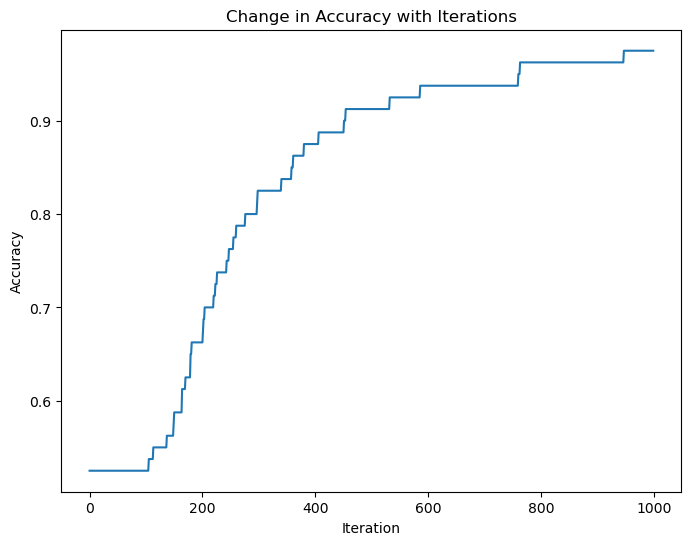

In [347]:
 # Построение графика изменения точности
plt.figure(figsize=(8, 6))
plt.plot(score_history)
plt.xlabel('Iteration')
plt.ylabel('score')
plt.title('Change in score with Iterations')
plt.show()

Посмотрим на логистическую модель с помощью метода оптимизации - градиентный спуск, самый часто используемый в данной модели. Замечаем, что модель учится постепенно, с каждой итерацией точность повышается. На 1000 итерации у модели точность - 0.975 на обучении, что довольно неплохо.

In [349]:
score_history[-1]

0.975

### Logistic regression with Root Mean Square Propagation, RMSProp
RMSProp представляет собой адаптивный метод градиентного спуска, который адаптирует скорость обучения для каждого параметра на основе скользящего среднего квадратов градиентов  
'v' - значение скользящего среднего квадрата градиентов для каждого параметра  
'beta' - контролирует вклад предыдущего скользящего среднего в текущее значение
'gradient' - текущий градиент  
<br>
Чем ближе beta к 1, тем больше влияние имеют прошлые градиенты, и тем плавнее изменяется скользящее среднее. С другой стороны, если beta близко к 0, то только текущий градиент будет иметь существенное влияние, что может привести к более быстрой адаптации к последним обновлениям градиента.

In [835]:
def logistic_regression_rmsprop(X, y, learning_rate=0.05, num_iterations=200, beta=0.6, epsilon=1e-8):
    X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add bias term
    theta = np.zeros(X.shape[1])
    v = np.zeros(X.shape[1])  # Инициализация скользящего среднего квадратов градиентов

    score_history = []  # Для сохранения истории точности

    for _ in range(num_iterations):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / y.size

        v = beta * v + (1 - beta) * gradient**2  # Обновление скользящего среднего квадратов градиентов
        theta -= learning_rate * gradient / (np.sqrt(v) + epsilon)  # Обновление параметров с учетом скользящего среднего

        predictions = predict(X[:, 1:], theta)
        acc = score(y, predictions)
        score_history.append(acc)

    return theta, np.array(score_history)

In [836]:
 # Обучение логистической регрессии с использованием RMSProp и сохранение истории точности
for i in range(len(Y_test)):
    theta, score_history = logistic_regression_rmsprop(X_train, Y_train)
    predictions = predict(X_test, theta)
    acc = score(Y_test, predictions)
    print(f"score {i}:", acc) 
    

score 0: 0.9
score 1: 0.9
score 2: 0.9
score 3: 0.9
score 4: 0.9
score 5: 0.9
score 6: 0.9
score 7: 0.9
score 8: 0.9
score 9: 0.9
score 10: 0.9
score 11: 0.9
score 12: 0.9
score 13: 0.9
score 14: 0.9
score 15: 0.9
score 16: 0.9
score 17: 0.9
score 18: 0.9
score 19: 0.9


In [837]:
# Прогнозирование на тестовом наборе
predictions = predict(X_test, theta)

In [838]:
predictions

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0])

In [839]:
 # Вычисление и вывод точности
acc = score(Y_test, predictions)
formatted_acc = "{:.2f}".format(acc)
print("score:", formatted_acc)

score: 0.90


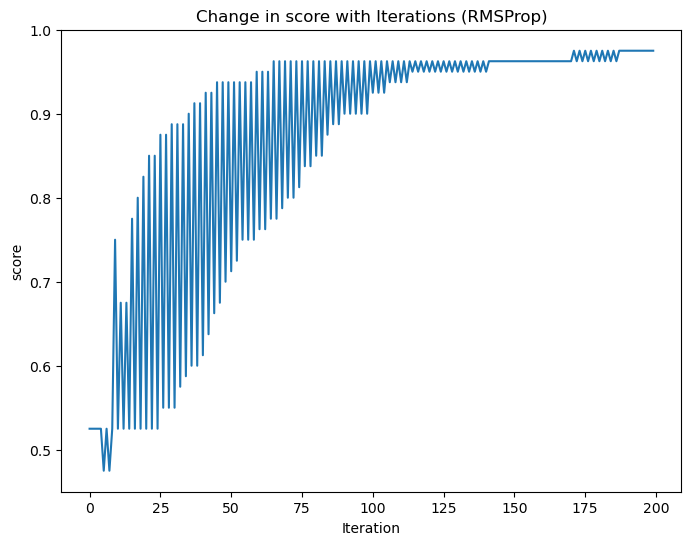

In [840]:
  # Построение графика изменения точности
plt.figure(figsize=(8, 6)) # график такой, зато acc самое большое 
plt.plot(score_history)
plt.xlabel('Iteration')
plt.ylabel('score')
plt.title('Change in score with Iterations (RMSProp)')
plt.show()

Замечаем, что в данном методе модель обучается по-другому. У нее больший "размах" по точности. Но если проследить тенденцию, то модель все-таки обучается довольно быстро. Уже к 450 итерации точность составляет 1. Что намного быстрее, чем в обычном градиентном спуске (там мы до 1.0 даже не дошли пока)

In [834]:
#score_history[449] output: 1.0

1.0

### Logistic regression with Nesterov–accelerated Adaptive Moment Estimation

Данный метод включает в себя историю и адаптивный шаг для более стабильной и быстрой сходимости  
Nadam объединяет два метода оптимизации - Adam и NAG  
'm', 'v' - сохраняют моменты первого и второго градиента соответственно  
't' - номер итерации

In [799]:
def logistic_regression_nadam(X, y, learning_rate=0.05, num_iterations=400, beta1=0.9, beta2=0.999, epsilon=1e-8):
    X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add bias term
    theta = np.zeros(X.shape[1])
    m = np.zeros(X.shape[1])  # Инициализация первых моментов
    v = np.zeros(X.shape[1])  # Инициализация вторых моментов
    t = 0  # Итерация

    score_history = []  # Для сохранения истории точности

    for _ in range(num_iterations):
        t += 1
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / y.size

        m = beta1 * m + (1 - beta1) * gradient  # Обновление первых моментов
        v = beta2 * v + (1 - beta2) * gradient**2  # Обновление вторых моментов

        # Исправление смещения моментов
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)

        # Обновление параметров с использованием моментов и адаптивного шага
        theta -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)

        predictions = predict(X[:, 1:], theta)
        acc = score(y, predictions)
        score_history.append(acc)

    return theta, np.array(score_history)

In [800]:
 # Обучение логистической регрессии с использованием Nadam и сохранение истории точности
theta, score_history = logistic_regression_nadam(X_train, Y_train)

In [801]:
  # Прогнозирование на тестовом наборе
predictions = predict(X_test, theta)

In [802]:
 # Вычисление и вывод точности
acc = score(Y_test, predictions)
print("score:", acc)

score: 0.85


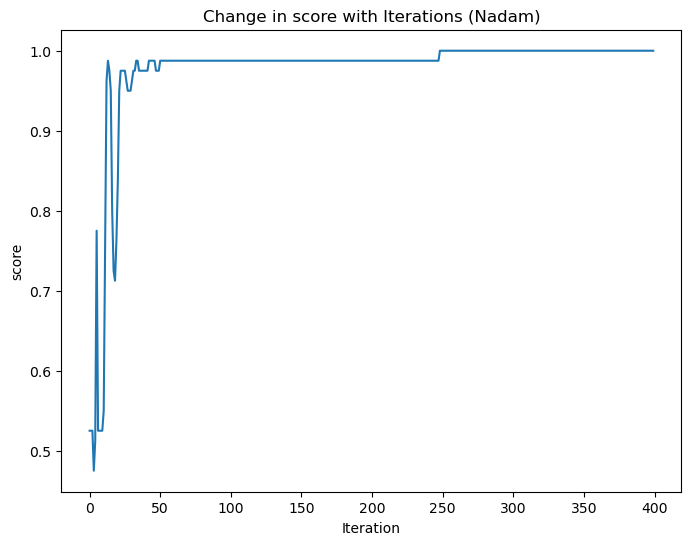

In [803]:
# Построение графика изменения точности
plt.figure(figsize=(8, 6))
plt.plot(score_history)
plt.xlabel('Iteration')
plt.ylabel('score')
plt.title('Change in score with Iterations (Nadam)')
plt.show()

График обучения данный модели сразу стремится вверх, что нельзя сказать о наших предыдущих моделях (можно, но они не такие быстрые). Уже на 100ой итерации модель достигает точности 0.975, а к 400ой - 1.0. Похожие показатель можно заметить у RMSProp (но там график заметно отличается)

In [804]:
score_history[100]

0.9875

In [806]:
score_history[399]

1.0

In [859]:
import time

# Замер времени для метода GD
start_time = time.time()
theta_gd, score_history_gd = logistic_regression(X_train, Y_train)
gd_time = time.time() - start_time

# Замер времени для метода RMSProp
start_time = time.time()
theta_rmsprop, score_history_rmsprop = logistic_regression_rmsprop(X_train, Y_train)
rmsprop_time = time.time() - start_time

# Замер времени для метода Nadam
start_time = time.time()
theta_nadam, score_history_nadam = logistic_regression_nadam(X_train, Y_train)
nadam_time = time.time() - start_time

# Прогнозирование на тестовом наборе для метода GD
predictions_gd = predict(X_test, theta_gd)
acc_gd = score(Y_test, predictions_gd)

# Прогнозирование на тестовом наборе для метода RMSProp
predictions_rmsprop = predict(X_test, theta_rmsprop)
acc_rmsprop = score(Y_test, predictions_rmsprop)

# Прогнозирование на тестовом наборе для метода Nadam
predictions_nadam = predict(X_test, theta_nadam)
acc_nadam = score(Y_test, predictions_nadam)


# Вывод результатов
print("| Метод          | Точность | Время работы (сек) |")
print("|----------------|----------|--------------------|")
print(f"| GD             | {acc_gd:.4f}   |       {gd_time:.4f}       |")
print(f"| RMSProp        | {acc_rmsprop:.4f}   |       {rmsprop_time:.4f}       |")
print(f"| Nadam          | {acc_nadam:.4f}   |       {nadam_time:.4f}       |")


| Метод          | Точность | Время работы (сек) |
|----------------|----------|--------------------|
| GD             | 0.8500   |       0.1738       |
| RMSProp        | 0.9000   |       0.0347       |
| Nadam          | 0.8500   |       0.0711       |
